<a href="https://colab.research.google.com/github/furkanardadincer/CreditRiskPrediction/blob/main/LRegression_KrediRiskTahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Mount Google Drive
df = pd.read_csv('/content/drive/MyDrive/giveMeSomeCredit/archive/cs-training.csv')

In [17]:
# Gereksiz sütunu düşür
df.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
# Eksik değerleri doldur
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['NumberOfDependents'].fillna(0, inplace=True)

<ipython-input-18-ba67222f6222>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
<ipython-input-18-ba67222f6222>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [19]:
# Hedef ve özellikleri ayır
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

In [20]:
# Verileri ölçekle (normalize et)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Eğitim/test ayırımı
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
log_model = LogisticRegression(max_iter=1000, solver='liblinear')
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [23]:
# Tahminler
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]

In [24]:
print("=== Lojistik Regresyon Performansı ===")
print(classification_report(y_test, y_pred_log))
print(f"ROC AUC Skoru: {roc_auc_score(y_test, y_proba_log):.4f}")

=== Lojistik Regresyon Performansı ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.52      0.04      0.07      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.52      0.52     30000
weighted avg       0.91      0.94      0.91     30000

ROC AUC Skoru: 0.6928


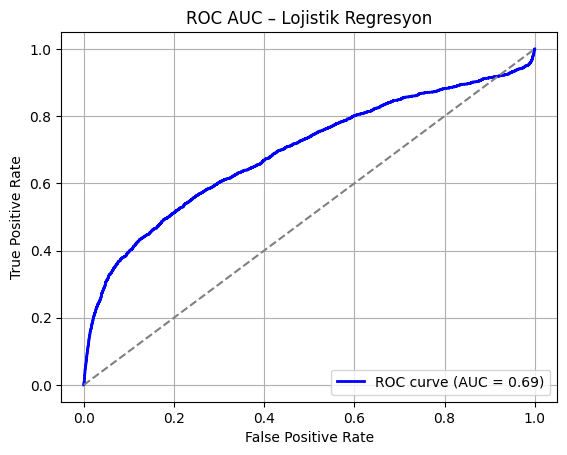

In [25]:
# ROC AUC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log)
roc_auc = roc_auc_score(y_test, y_proba_log)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC – Lojistik Regresyon')
plt.legend(loc="lower right")
plt.grid()
plt.show()